# Assignment

This is an example assignment illustrating the basic features of Otter Grader and allowing to demonstrate the whole process:
* teacher: generating an assignment
* student: working on an assignment and testing work
* teacher: autograding

<div style="padding:8px 0 8px 15px;border-left:3px solid DarkOrange;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Instructions</span><br/>

Execute the cell with the imports first.  
Then follow the instructions.
</div>

## Ignore ##

Notes:
* This notebook HAS TO BE EXECUTED before generating the assignment!!!
* More information about the different features to specify questions, solutions, tests, etc. here: 
    * https://github.com/ucbds-infra/otter-grader/blob/master/docs/otter_assign/v1/notebook_format.rst
    * https://github.com/okpy/jassign/blob/master/docs/notebook-format.md

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import otter
grader = otter.Notebook("assignment.ipynb") # The name of the notebook is important if there are multiple notebooks in the folder!

---

# Exercise 1: squaring numbers

<div style="padding:8px 0 8px 15px;border-left:3px solid #0312aa;background-color:#F3F3F3;">

**1 point:** Your function computes correctly the square of its argument. The type of operator you use does not matter.

</div>

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Question</span><br/>

Write a function `square` that returns the square of its argument.
</div>

In [2]:
def square(x):
    return x**2 # SOLUTION

In [3]:
""" # BEGIN TEST CONFIG
hidden: false
failure_message: These tests indicate that your function does not compute the square of the number. What operator did you choose? Did you test your function on different values?
success_message: Well done! However, keep in mind that these tests are not complete and do not guarantee your code is correct. Did you test your function on different values?
""" # END TEST CONFIG
assert square(1) == 1
assert square(0) == 0

In [4]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
success_message: It looks like your square function indeed computes the square of the number, well done!
failure_message: It is probable that your function computes a different power than 2. Did you test your function with different values?
""" # END TEST CONFIG
assert square(2.5) == 6.25
assert square(-1) == 1

---

# Exercise 2: computing a tension in a cable 

Remember the suspended jeans example seen in the lecture:

<img src="figs/jeans-sketch-forces-removebg.png" alt="sketch" style="width:400px;"/>
<p style="font-style:italic;">Figure: Angle and forces in the suspended jeans situation</p>

We have seen in the lecture that the tension in the cable is defined by:

$
\begin{align}
\lvert\vec{T}\rvert = \frac{\frac{1}{2}.m.g}{sin(\alpha)}
\end{align}
$

Your goal is to write a Python function to **compute the tension in the cable** for **different values of the angle $\alpha$**.

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Question</span><br/>

**Complete the code of the function `tension_norm`** by implementing the equation above.  

The function takes as inputs the mass of the suspended object and the angle **expressed in degrees**.
    
Here is some syntax you will need:
* variables: you can use `g`, `m` and `alpha`
* multiplication: `*`
* division: `/`
* sinus function $sin(x)$: `np.sin(x)`
* number $\pi$: `np.pi`

You can also use parentheses to indicate the order of operations.
    
</div>

<div style="padding:8px 0 8px 15px;border-left:3px solid #0312aa;background-color:#F3F3F3;">

**3 points:** Your function computes correctly the tension in the cable for any mass and any angle expressed in *degrees*. For a zero angle, the tension returned should be zero.

</div>

In [5]:
def tension_norm(m, alpha):
    """
    Computes the tension for a given mass and a given angle.

    Parameters
    ----------
    m : mass of the suspended object
    alpha : angle between cable and horizon, expressed in DEGREES

    Returns
    -------
    Tension in the cable as computed by the equation seen in the lecture
    """
    g = 9.81
    tension = 0
    
    # BEGIN SOLUTION
    # First convert degrees to radians 
    alpha_radians = alpha * np.pi / 180 
    
    # Check if the angle is different from zero (otherwise it will return zero)
    if alpha != 0: 
        # Then compute the tension 
        tension = (1/2 * m * g) / np.sin(alpha_radians) 
    # END SOLUTION
    
    return tension

Now don't forget to test your functions with several values!

In [6]:
# Your tests here:


In [7]:
""" # BEGIN TEST CONFIG
hidden: false
failure_message: Check your computation again, does the sinus function work with angles in degrees?
success_message: Well done! You thought about converting your angle from degrees to radians!
""" # END TEST CONFIG
assert np.isclose(tension_norm(3, 30), 29.43)

In [8]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
success_message: Computation correct (angle converted to radians)
failure_message: Computation not correct, angle probably not converted to radians
""" # END TEST CONFIG
# Checks that the angle is converted to radians
assert np.isclose(tension_norm(3, 2), 421.6393)

In [9]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
success_message: Mass of the object taken into account in computation
failure_message: Mass of the object not taken into account
""" # END TEST CONFIG
# Checks that the computation takes the parameter m as an input
np.random.seed(42) # SEED
assert tension_norm(0, np.random.random())==0

In [10]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
success_message: Edge case with null angle properly managed
failure_message: Edge case with null angle not managed, division by zero possible
""" # END TEST CONFIG
# Check that the case of the null angle has been managed
assert tension_norm(np.random.random(), 0)==0

---

# Exercise 3: Pandas dataframe operations

Let's consider the following list of prices for icecreams at Loom:
| flavor | scoops | price |
|-----|-----|-----|
| chocolate | 1 | 2 |
| vanilla | 1 | 1.5 |
| chocolate | 2 | 3 |
| strawberry | 1 | 2 |
| strawberry | 3 | 4 |
| vanilla | 2 | 2 |
| mint | 1 | 4 |
| mint | 2 | 5 |
| chocolate | 3 | 5 |

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Question 1</span><br/>

Create a DataFrame mirroring the table above and assign this to `data`.  
Then group by the `flavor` column and find the mean price for each flavor; assign this **series** to `price_by_flavor`.    
</div>

<div style="padding:8px 0 8px 15px;border-left:3px solid #0312aa;background-color:#F3F3F3;">

**2 points:** The dataframe correctly reflects the table above in terms of structure and content. The variable `price_by_flavor` contains the correct mean price for each flavor.

</div>

In [11]:
# BEGIN SOLUTION NO PROMPT
# Creation of the dataframe
data = pd.DataFrame({
    "flavor": ["chocolate", "vanilla", "chocolate", "strawberry", "strawberry", "vanilla", "mint", 
               "mint", "chocolate"],
    "scoops": [1, 1, 2, 1, 3, 2, 1, 2, 3],
    "price": [2, 1.5, 3, 2, 4, 2, 4, 5, 5]
})

# Use of groupby to compute the mean per flavor
price_by_flavor = data.groupby("flavor").mean()["price"]
# END SOLUTION
""" # BEGIN PROMPT
data = ...
price_by_flavor = ...
""" # END PROMPT
price_by_flavor

flavor
chocolate     3.333333
mint          4.500000
strawberry    3.000000
vanilla       1.750000
Name: price, dtype: float64

In [12]:
""" # BEGIN TEST CONFIG
hidden: false
failure_message: It looks like your dataframe does not correspond to the specification. Check it carefully before going further.
success_message: Your dataframe seems correctly specified. You can go on and compute the groupby operations.
""" # END TEST CONFIG
# Check that the dataframe is correctly entered: it should have 4 different flavors
assert len(data["flavor"].unique()) == 4
# Check that the dataframe is correctly entered: it should have chocolate, vanilla, strawberry and mint
for l in ["chocolate", "vanilla", "strawberry", "mint"]:
    assert l in data["flavor"].unique()

In [13]:
""" # BEGIN TEST CONFIG
hidden: false
failure_message: The result of your groupby should be a Series with 4 elements. Check your computation again.
success_message: The structure of the result of your groupby appears to be correct. Make sure you apply the appropriate operator to the result.
""" # END TEST CONFIG
# The result of the groupby should be a Series
assert type(price_by_flavor) == pd.Series
# The result of the groupby should have 4 elements
assert len(price_by_flavor) == 4

In [14]:
""" # BEGIN TEST CONFIG
hidden: true
points: 2
""" # END TEST CONFIG
assert np.isclose(price_by_flavor["chocolate"], 3.33333333)
assert np.isclose(price_by_flavor["mint"], 4.5)
assert np.isclose(price_by_flavor["strawberry"], 3)
assert np.isclose(price_by_flavor["vanilla"], 1.75)

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Question 2</span><br/>

Create a barplot of `price_by_flavor`.
</div>

<div style="padding:8px 0 8px 15px;border-left:3px solid #0312aa;background-color:#F3F3F3;">

**1 point:** The barplot displays the mean price by flavor, whether vertically or horizontally.

</div>

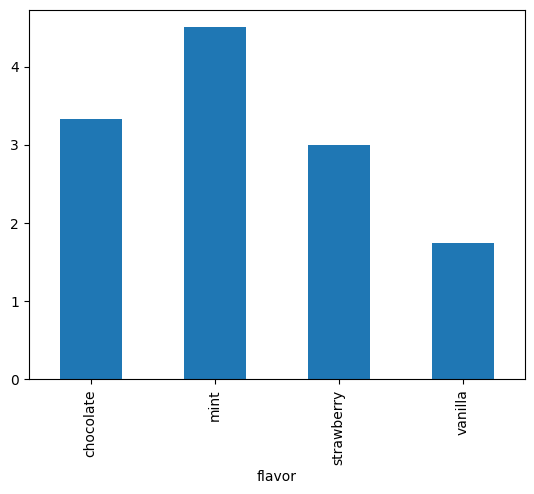

In [15]:
price_by_flavor.plot.bar(); # SOLUTION

<div style="padding:8px 0 8px 15px;border-left:3px solid #B51F1F;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Question 3</span><br/>

Which flavors sells at the best price on average?
</div>

<div style="padding:8px 0 8px 15px;border-left:3px solid #0312aa;background-color:#F3F3F3;">

**1 point:** The answers indicates the flavor which sells at the best price (only 1 word needed).

</div>

**SOLUTION:** Mint 

---

# Submitting your work

<div style="padding:8px 0 8px 15px;border-left:3px solid DarkOrange;background-color:#F3F3F3;">
    <span style="font-weight:bold;text-decoration:underline;">Instructions</span><br/>

1. Make sure that there are no hidden states by **restarting your kernel and running all cells**. Check that the code runs without errors.
2. Then **save your notebook** and make sure that all the outputs are present in the file before submitting.  
    Please **DO NOT rename the notebook**.
3. Connect to moodle, find the assignment link, then create a submission and **select the folder that contains your work**
</div>